# 88-Inch Foil Activation Experiment to Measure ETA Neutron Spectrum

The source was 33 MeV deuteron break-up on Ta.

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurement time was 70418.0 seconds with an integrated measurement of 0.759992152.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

The integral fluxes were calculated using a [STAYSL FIR Run](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/FIR).  Once the FIR run is created, the integral flux can be calculated from the code segment below and entered into the SigPhi Calculator.

In [5]:
from Unfolding.STAYSL import integralXSecEst

firPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/SigPhi_Calculator/FIR/'

integralXSecEst(firPath, numRx=6)

The epithermal/thermal ratio is: 171.509974734

AU197G
The > 0.1 flux weighted sigma is: 0.0676332206455
The > 1 flux weighted sigma is: 0.0192244375137
AL27P
The > 0.1 flux weighted sigma is: 0.0219491979955
The > 1 flux weighted sigma is: 0.0219491979955
AL27A
The > 0.1 flux weighted sigma is: 0.0243749813843
The > 1 flux weighted sigma is: 0.0243749813843
NI582
The > 0.1 flux weighted sigma is: 0.00524730850596
The > 1 flux weighted sigma is: 0.00524730850596
IN115N
The > 0.1 flux weighted sigma is: 0.119558244971
The > 1 flux weighted sigma is: 0.112587699734
AU1972
The > 0.1 flux weighted sigma is: 0.386506230663
The > 1 flux weighted sigma is: 0.386506230663
AU197G
The > 0.1 flux weighted sigma is: 0.0676332206455
The > 1 flux weighted sigma is: 0.0192244375137


## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [4]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_Foil_tgt_CR.o'
check_path(simPath)

(tallyFrame, tallyTot, uncertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)

stayslFlux(tallyFrame)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_Foil_tgt_CR.o
The flux:
 0.0000e+00 6.7336e-10 2.3440e-09 7.0791e-09 4.6653e-09 4.1980e-09 2.4827e-09 
 2.6444e-09 1.9601e-09 1.5473e-09 1.6797e-09 1.9314e-09 1.5202e-09 1.8902e-09 
 1.2395e-09 1.2806e-09 1.2817e-09 1.3973e-09 2.2202e-09 1.5918e-09 2.1406e-09 
 2.3895e-09 2.2756e-09 1.7151e-09 1.0737e-09 1.8636e-09 1.4453e-09 1.7041e-09 
 1.6808e-09 2.2972e-09 3.7841e-09 2.2190e-09 2.8108e-09 2.7217e-09 4.0752e-09 
 5.8117e-09 4.8034e-09 9.6896e-09 8.1826e-09 1.2169e-08 1.4342e-08 2.7003e-08 
 2.6464e-08 3.5474e-08 6.4412e-08 9.4647e-08 7.4403e-08 1.4855e-07 1.8122e-07 
 3.5261e-07 2.9520e-07 4.3374e-07 3.6442e-07 4.6672e-07 4.3757e-07 5.1644e-07 
 5.5059e-07 4.3525e-07 6.1286e-07 5.9083e-07 6.9720e-07 7.3380e-07 7.2786e-07 
 7.4773e-07 8.9376e-07 9.5933e-07 1.0261e-06 9.3899e-07 1.2943e-06 1.2179e-06 
 2.4697e-06 2.0325e-06 1.7326e-06 1.4108e-06 1.1312e-06 1.2529e

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [6]:
import pandas as pd

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=101, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert
1,1.000000e-10,1.553700e+08,9.876800e+07,1.573,4.005439e+07,3.027239e+07,0.841,358090.00000,0.55
2,1.000000e-09,9.814500e+08,7.420500e+08,1.323,1.233683e+08,1.162050e+08,0.803,358090.00000,0.55
3,1.000000e-08,2.149700e+09,1.788300e+09,1.202,1.483293e+08,1.620200e+08,0.762,358080.00000,0.55
4,2.300000e-08,2.983100e+09,2.600400e+09,1.147,1.330463e+08,1.612248e+08,0.719,358050.00000,0.55
5,5.000000e-08,2.088600e+09,1.779700e+09,1.174,9.774648e+07,1.224434e+08,0.681,357970.00000,0.55
6,7.600000e-08,1.334600e+09,1.067600e+09,1.250,8.141060e+07,1.006747e+08,0.647,357920.00000,0.55
7,1.150000e-07,5.828400e+08,4.477000e+08,1.302,3.992454e+07,4.951562e+07,0.619,357860.00000,0.55
8,1.700000e-07,3.997200e+08,3.085600e+08,1.295,2.570200e+07,3.307763e+07,0.600,357830.00000,0.55
9,2.550000e-07,2.019100e+08,1.555200e+08,1.298,1.302320e+07,1.692058e+07,0.592,357800.00000,0.55
10,3.800000e-07,1.228300e+08,9.027200e+07,1.361,9.826400e+06,1.209645e+07,0.597,357770.00000,0.55


Convert to Histograms and plot the adjusted and unadjusted flux.

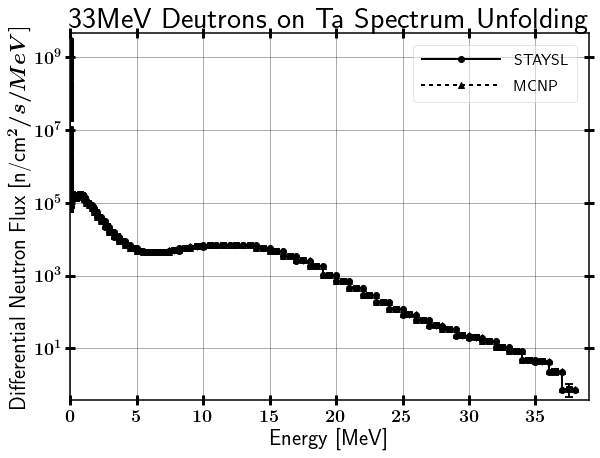

In [7]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/'

adjDiffHisto = Histogram()
adjDiffHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjDiffHisto = Histogram()
unadjDiffHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjDiffHisto.plot(unadjDiffHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Differential Neutron Flux [n/cm^2/s/MeV]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Differential')

Convert from differential spectrum and plot.

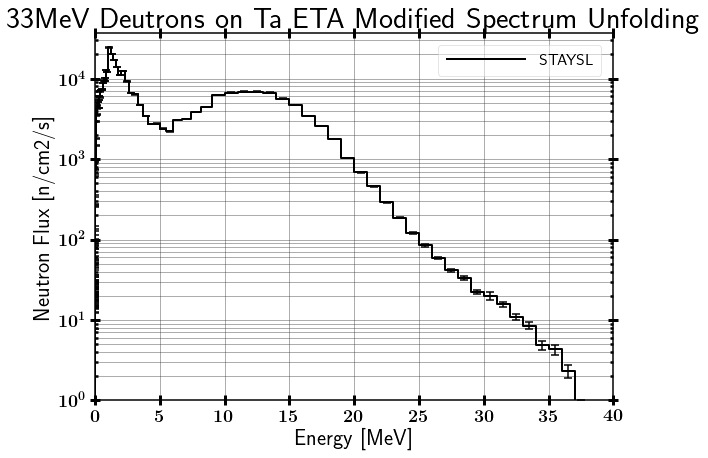

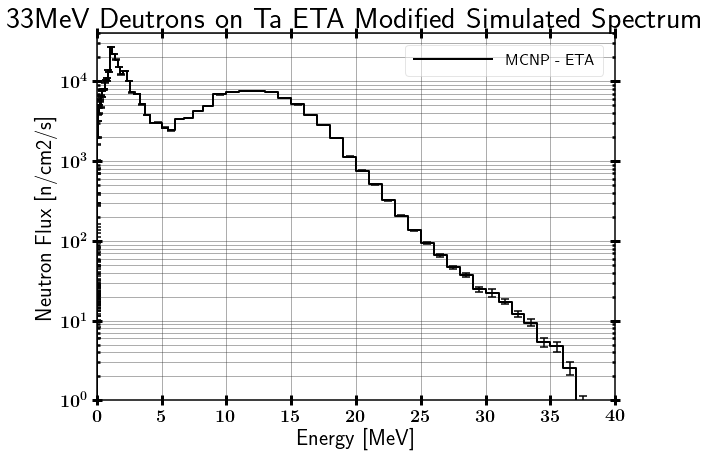

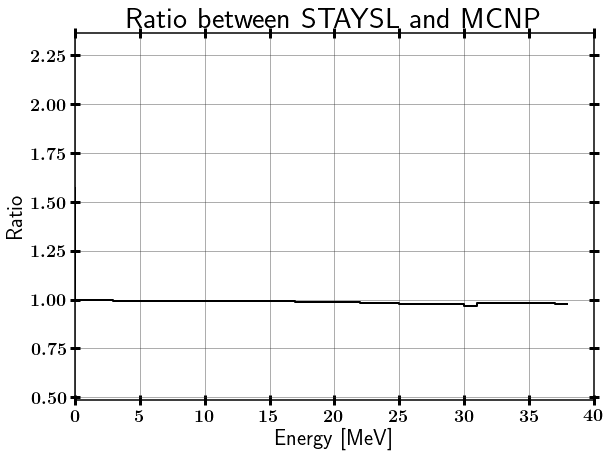

In [15]:
from DataAnalysis.DataManipulation import bin_integration

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(),
                     bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low'),
                     uncert=bin_integration(df['lowE'].tolist(), df['adjStd'].tolist(), 'low'),
                     edgeLoc='low', name='STAYSL')

adjHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold')

mcnpHisto = Histogram()
normFactor = 1.08E10 #6.35E7
tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
mcnpHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP - ETA')
mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
               title='33MeV Deutrons on Ta ETA Modified Simulated Spectrum',
               xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
               savePath=outpath+'33MeVTa_MCNP')

ratioHisto = Histogram()
ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP',
              xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

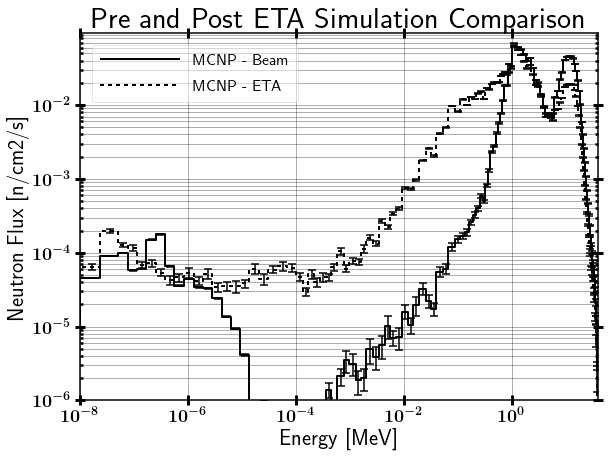

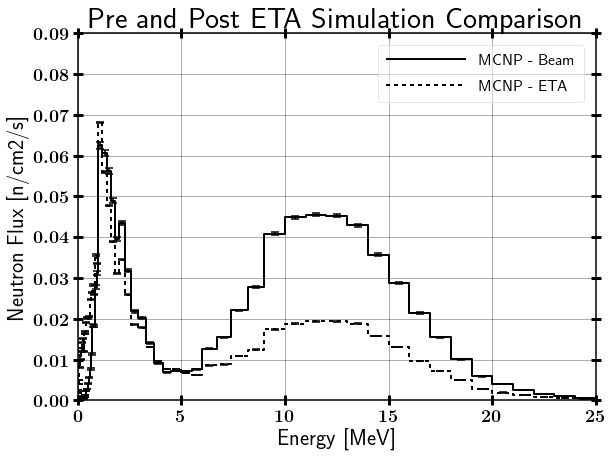

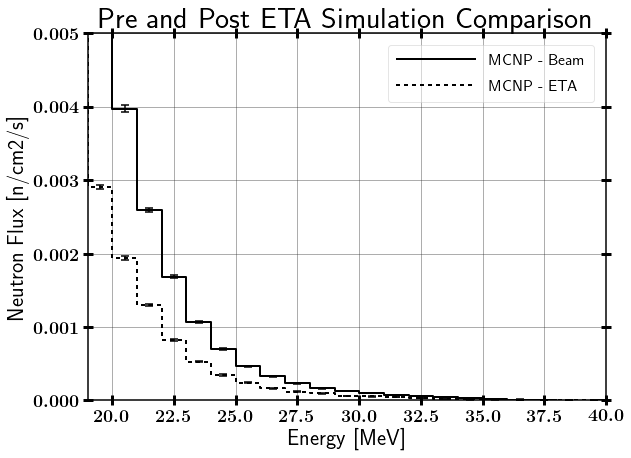

In [9]:
import numpy as np

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/stayslin.out'
beamDF = pd.read_table(path, engine='python', sep='\s+', skiprows=101, skipfooter=649, header=None,
                       names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                       'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

beamDF.apply(pd.to_numeric)
beamDF['adjFlux'] = bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')
beamDF['adjStd'] = beamDF['adjStd'] / 100
beamDF['normAdjFlux'] = beamDF['adjFlux'] / sum(beamDF['adjFlux'])
beamDF['normAdjStd'] = beamDF['adjStd'] * beamDF['normAdjFlux']

mcnpBeamNormHisto = Histogram()
mcnpBeamNormHisto.build_histo(beamDF['lowE'].tolist(), beamDF['normAdjFlux'].tolist(), 
                              uncert=beamDF['normAdjStd'].tolist(), edgeLoc='low',
                              name='MCNP - Beam')

mcnpETANormHisto = Histogram()
mcnpETANormHisto.build_histo(tallyFrame['bin'].tolist(), 
                             (tallyFrame['tally']* (1.0 / sum(tallyFrame['tally']))).tolist(), 
                             uncert=(tallyFrame['uncertainty']*tallyFrame['tally']*(1.0/sum(tallyFrame['tally']))).tolist(),
                             edgeLoc='up', name='MCNP - ETA')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=True, logY=True, legendLoc=2,
                      includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                      xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                      savePath=outpath+'33MeVTa_MCNP_NormComp_log')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=0, xMax=25, yMax=0.09, logX=False, logY=False, legendLoc=1,
                      includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                      xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                      savePath=outpath+'33MeVTa_MCNP_NormComp_lin')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=19, xMax=40, yMin=1e-8, yMax=0.005, logX=False, logY=False,
                      includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                      xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                      savePath=outpath+'33MeVTa_MCNP_Comp')

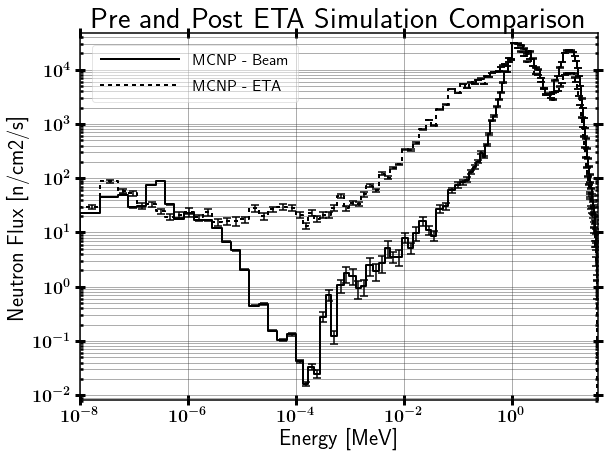

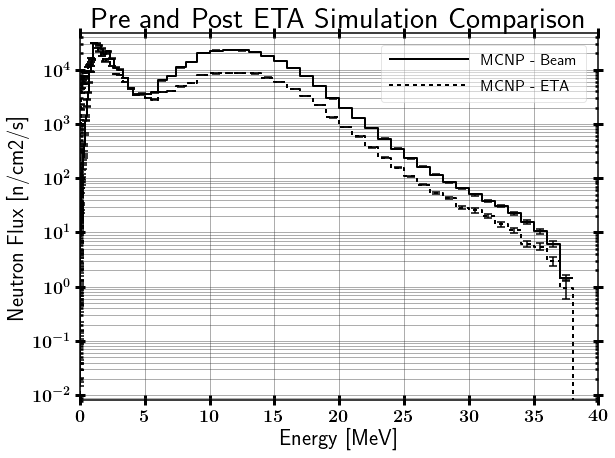

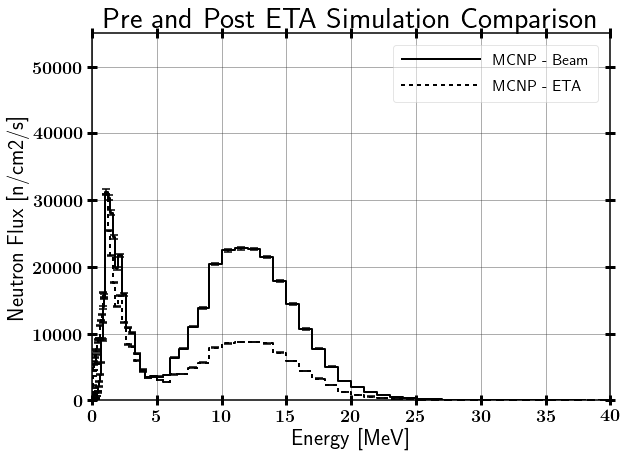

In [10]:
mcnpBeamHisto = Histogram()
mcnpBeamHisto.build_histo(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 
                          uncert=(beamDF['adjStd']*beamDF['adjFlux']).tolist(), edgeLoc='low',
                          name='MCNP - Beam')

mcnpBeamHisto.plot(mcnpHisto, xMin=1E-8, xMax=40, logX=True, logY=True, legendLoc=2,
                   includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp_log')

mcnpBeamHisto.plot(mcnpHisto, xMin=1E-3, xMax=40, logX=False, logY=True,
                   includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp_semilog')

mcnpBeamHisto.plot(mcnpHisto, xMin=0, xMax=40, yMax=5.5E4, logX=False, logY=False,
                   includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp_lin')

### Iterative Solution #1:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [11]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=.001))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.001
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 9.06937, Std Norm = 0.849809055024
Chi^2 = 6.13671
Chi^2 = 5.41862
Chi^2 = 5.08626
Chi^2 = 4.8524
Chi^2 = 4.665
Chi^2 = 4.50941
Chi^2 = 4.37928
Chi^2 = 4.26996
Chi^2 = 4.1775
Chi^2 = 4.09886
Chi^2 = 4.03144
Chi^2 = 3.97288
Chi^2 = 3.9218
Chi^2 = 3.87643
Chi^2 = 3.83584
Chi^2 = 3.79917
Chi^2 = 3.76577
Chi^2 = 3.73506
Chi^2 = 3.7066
Chi^2 = 3.68018
Chi^2 = 3.65553
Chi^2 = 3.63224
Chi^2 = 3.61011
Chi^2 = 3.58919
Chi^2 = 3.56934
Chi^2 = 3.55043
Chi^2 = 3.53231
Chi^2 = 3.51487
Chi^2 = 3.49812
Chi^2 = 3.48195
Chi^2 = 3.46657
Chi^2 = 3.45163
Chi^2 = 3.43731
C

Chi^2 = 2.00689
Chi^2 = 2.00562
Chi^2 = 2.00437
Chi^2 = 2.0031
Chi^2 = 2.00187
Chi^2 = 2.00066
Chi^2 = 1.99943
Chi^2 = 1.99816
Chi^2 = 1.99693
Chi^2 = 1.99567
Chi^2 = 1.99447
Chi^2 = 1.99323
Chi^2 = 1.99202
Chi^2 = 1.9908
Chi^2 = 1.9896
Chi^2 = 1.98838
Chi^2 = 1.98718
Chi^2 = 1.98595
Chi^2 = 1.98474
Chi^2 = 1.98354
Chi^2 = 1.98234
Chi^2 = 1.98112
Chi^2 = 1.97992
Chi^2 = 1.97872
Chi^2 = 1.97755
Chi^2 = 1.97633
Chi^2 = 1.97516
Chi^2 = 1.97397
Chi^2 = 1.97277
Chi^2 = 1.97161
Chi^2 = 1.97044
Chi^2 = 1.96929
Chi^2 = 1.96808
Chi^2 = 1.96693
Chi^2 = 1.96574
Chi^2 = 1.96457
Chi^2 = 1.96337
Chi^2 = 1.96223
Chi^2 = 1.96105
Chi^2 = 1.9599
Chi^2 = 1.95872
Chi^2 = 1.95757
Chi^2 = 1.95641
Chi^2 = 1.95524
Chi^2 = 1.9541
Chi^2 = 1.95298
Chi^2 = 1.95184
Chi^2 = 1.95069
Chi^2 = 1.94954
Chi^2 = 1.94842
Chi^2 = 1.94729
Chi^2 = 1.94615
Chi^2 = 1.94504
Chi^2 = 1.94391
Chi^2 = 1.94281
Chi^2 = 1.94167
Chi^2 = 1.94057
Chi^2 = 1.93947
Chi^2 = 1.93837
Chi^2 = 1.93724
Chi^2 = 1.93613
Chi^2 = 1.935
Chi^2 = 1.93389

Beam TotalFluence = 2.658554e+05
MCNP ETA TotalFluence = 3.916067e+05
STAYSL ETA TotalFluence = 3.923367e+05


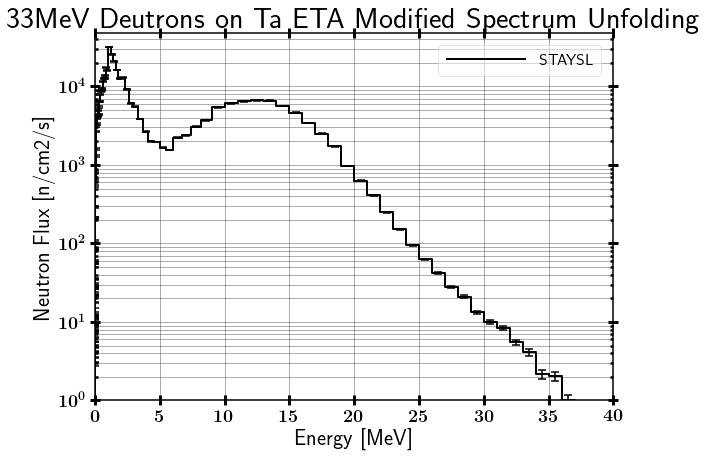

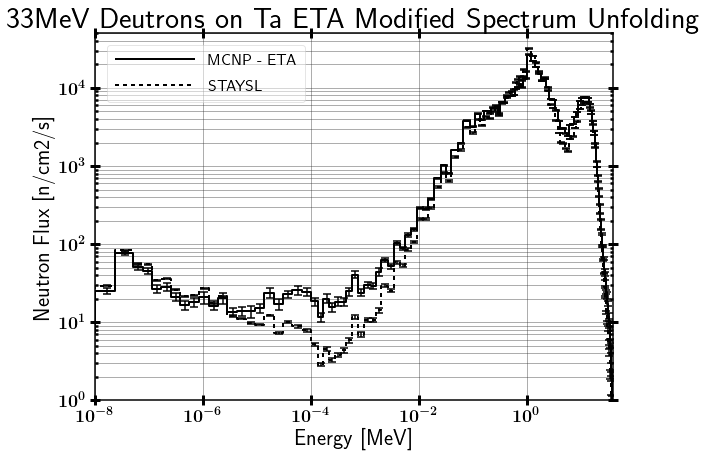

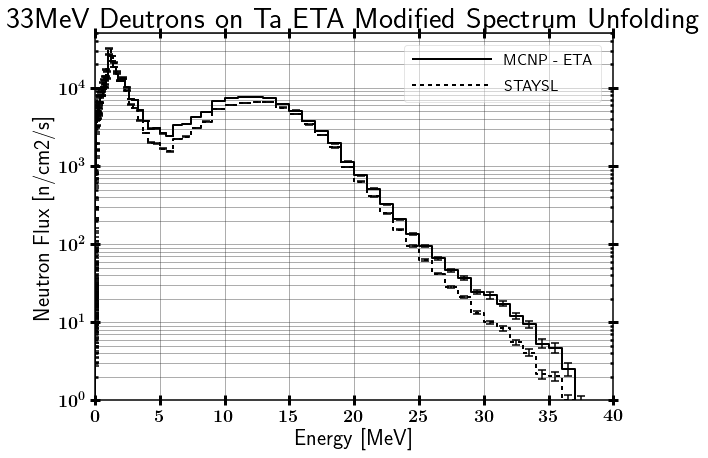

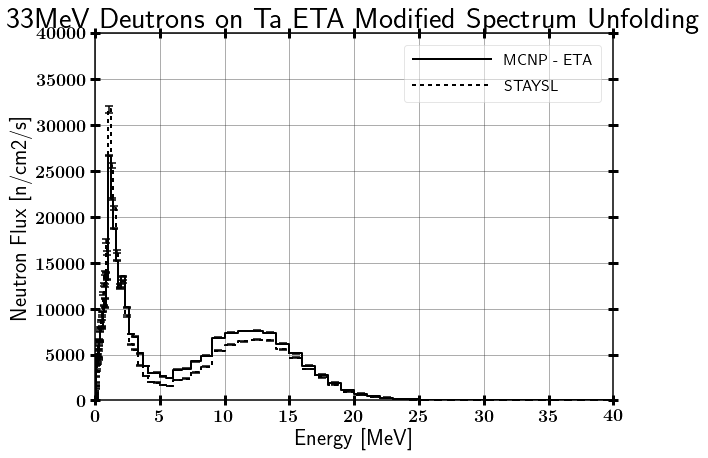

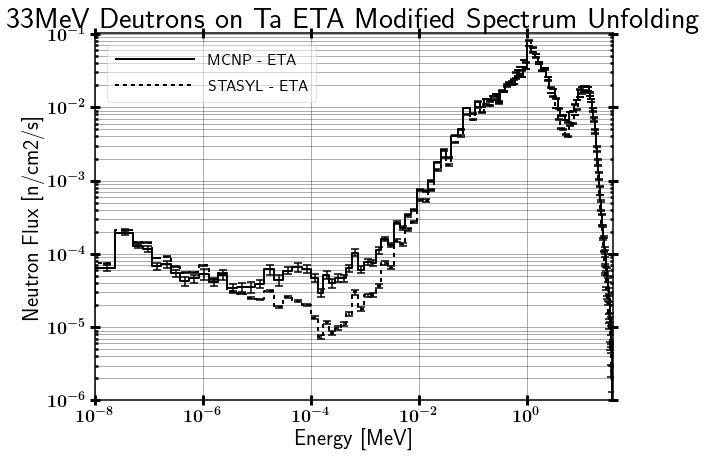

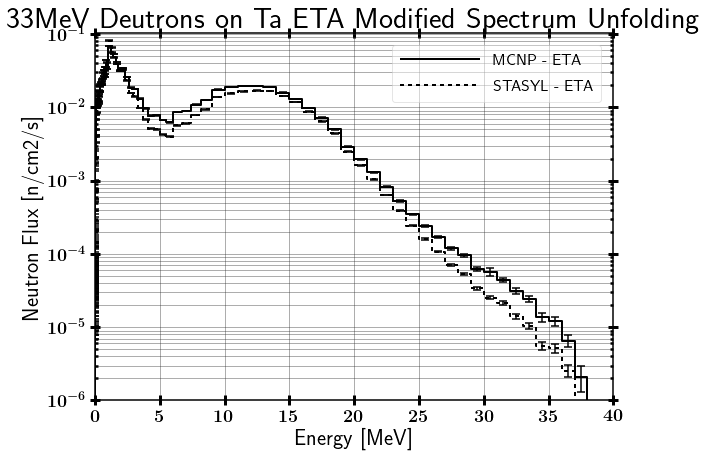

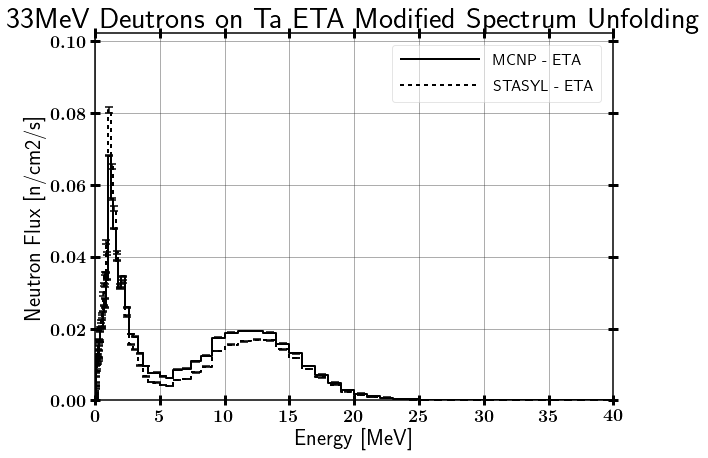

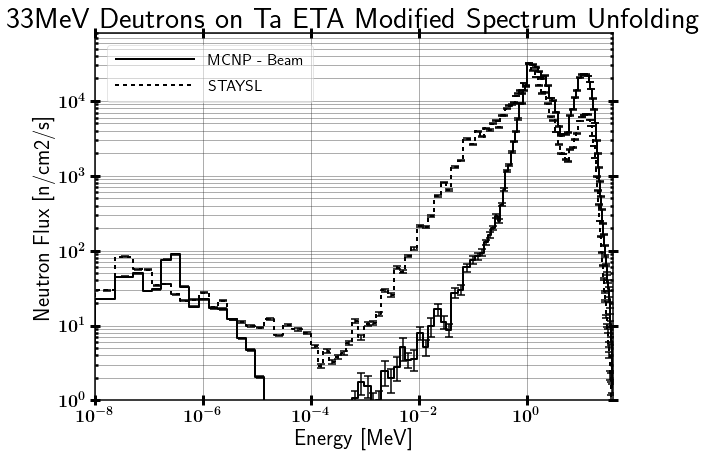

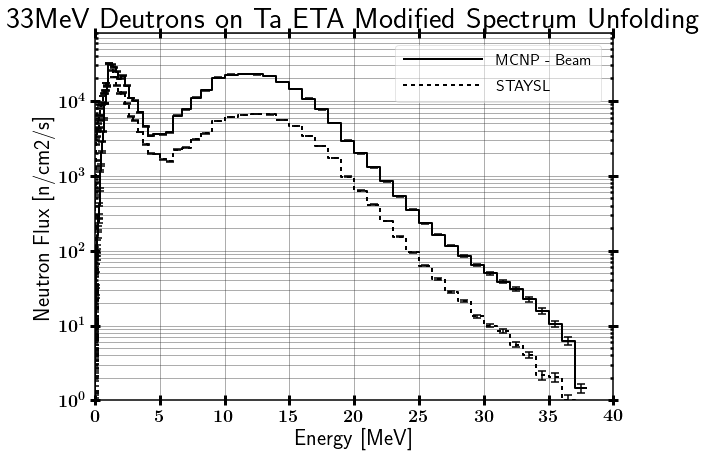

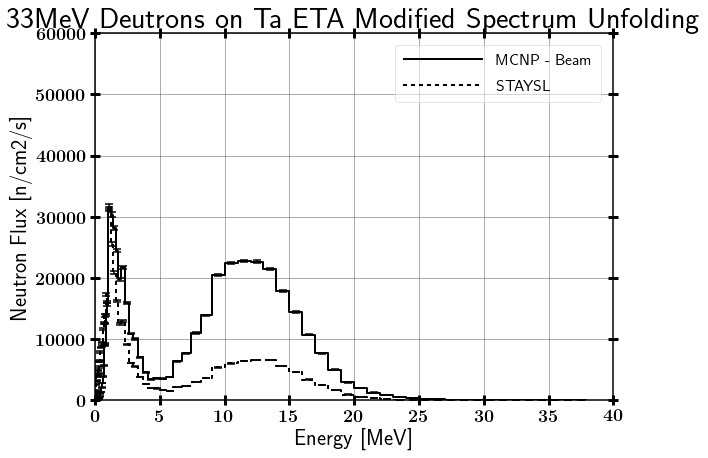

In [16]:
iter = 0

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

print "Beam TotalFluence = {:2e}".format(sum(bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')))
print "MCNP ETA TotalFluence = {:2e}".format(sum(tallyFrame['normTally']))
print "STAYSL ETA TotalFluence = {:2e}".format(sum(iterSoln[iter]._df['adjFlux']))

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

# Plot comparison of MCNP simulation for ETA to STAYSL ETA unfold
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-8, xMax=40, yMin=1, yMax=5E4, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2,
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_log')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_semilog')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=4E4, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_lin')

# Plot normalized comparison of MCNP simulation for ETA to STAYSL ETA unfold
etaNormHisto = Histogram()
iterSoln[iter]._df['normAdjFlux'] = iterSoln[iter]._df['adjFlux'] / sum(iterSoln[iter]._df['adjFlux'])
iterSoln[iter]._df['normAdjStd'] = iterSoln[iter]._df['adjStd'] *iterSoln[iter]._df['normAdjFlux']
etaNormHisto.build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['normAdjFlux'].tolist(), 
                              uncert=iterSoln[iter]._df['normAdjStd'].tolist(), edgeLoc='low',
                              name='STASYL - ETA')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2,
              savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_log')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-6, xMax=40, yMin=1E-6, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_semilog')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_lin')

# Plot comparison of measured Beam to measured ETA spectrum obtained froms STAYSL unfolds
mcnpBeamHisto.plot(iterAdjHisto[iter], xMin=1E-8, xMax=40, yMin=1, yMax=8E4, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2)
mcnpBeamHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=8E4, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')
mcnpBeamHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=6E4, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

#iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
#iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
#              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
#              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #2:

  - A uniform spectrum of 5E-7 with 100% uncertainty is used.
  - It does update the uncertainty throughout the convergence process. 

In [17]:
stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/'

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.002))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 0.002
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 6.73569, Std Norm = 5.28515150114
Chi^2 = 6.7262
Chi^2 = 6.71694
Chi^2 = 6.70799
Chi^2 = 6.69925
Chi^2 = 6.69077
Chi^2 = 6.68245
Chi^2 = 6.67428
Chi^2 = 6.66624
Chi^2 = 6.65834
Chi^2 = 6.65056
Chi^2 = 6.64294
Chi^2 = 6.63542
Chi^2 = 6.62788
Chi^2 = 6.62058
Chi^2 = 6.61327
Chi^2 = 6.60605
Chi^2 = 6.59878
Chi^2 = 6.59163
Chi^2 = 6.58458
Chi^2 = 6.57764
Chi^2 = 6.57075
Chi^2 = 6.56392
Chi^2 = 6.55703
Chi^2 = 6.55028
Chi^2 = 6.54362
Chi^2 = 6.53701
Chi^2 = 6.53047
Chi^2 = 6.52386
Chi^2 = 6.51736
Chi^2 = 6.51085
Chi^2 = 6.50442
Chi^2 = 6.49801
Chi^2 = 6.491

Chi^2 = 4.48882
Chi^2 = 4.4856
Chi^2 = 4.48229
Chi^2 = 4.47907
Chi^2 = 4.47587
Chi^2 = 4.47264
Chi^2 = 4.46938
Chi^2 = 4.46616
Chi^2 = 4.46301
Chi^2 = 4.45977
Chi^2 = 4.45655
Chi^2 = 4.45333
Chi^2 = 4.45012
Chi^2 = 4.44689
Chi^2 = 4.44365
Chi^2 = 4.44043
Chi^2 = 4.4372
Chi^2 = 4.43397
Chi^2 = 4.43074
Chi^2 = 4.42757
Chi^2 = 4.42437
Chi^2 = 4.42115
Chi^2 = 4.41791
Chi^2 = 4.41474
Chi^2 = 4.41149
Chi^2 = 4.40831
Chi^2 = 4.40514
Chi^2 = 4.40199
Chi^2 = 4.3988
Chi^2 = 4.39561
Chi^2 = 4.39244
Chi^2 = 4.38926
Chi^2 = 4.38607
Chi^2 = 4.38289
Chi^2 = 4.37973
Chi^2 = 4.37658
Chi^2 = 4.37341
Chi^2 = 4.37023
Chi^2 = 4.36704
Chi^2 = 4.36387
Chi^2 = 4.3607
Chi^2 = 4.35754
Chi^2 = 4.3544
Chi^2 = 4.35129
Chi^2 = 4.34813
Chi^2 = 4.345
Chi^2 = 4.34183
Chi^2 = 4.33873
Chi^2 = 4.33562
Chi^2 = 4.33248
Chi^2 = 4.32935
Chi^2 = 4.32629
Chi^2 = 4.32319
Chi^2 = 4.32007
Chi^2 = 4.31696
Chi^2 = 4.31381
Chi^2 = 4.31072
Chi^2 = 4.30761
Chi^2 = 4.30449
Chi^2 = 4.3014
Chi^2 = 4.29835
Chi^2 = 4.29523
Chi^2 = 4.29216


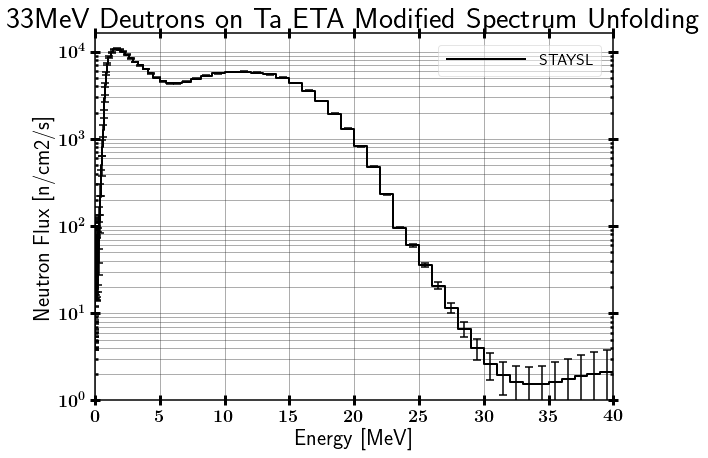

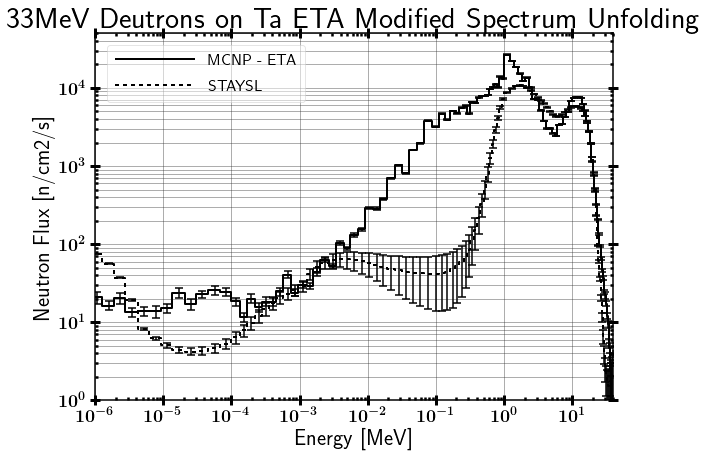

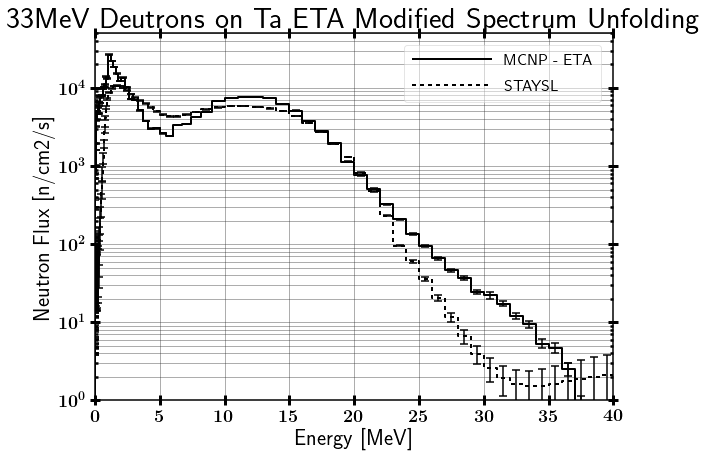

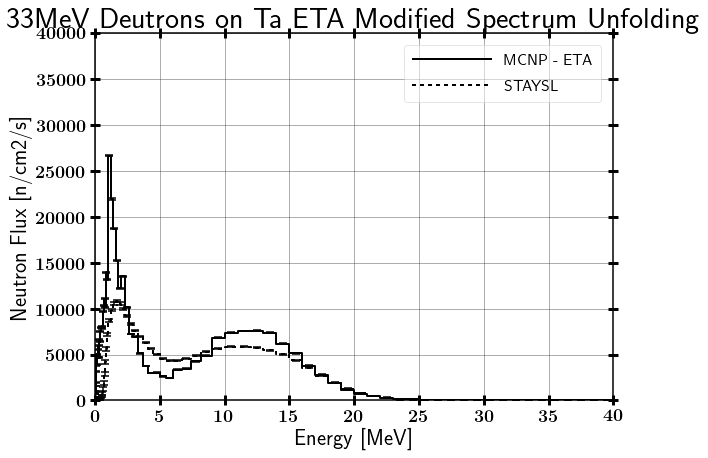

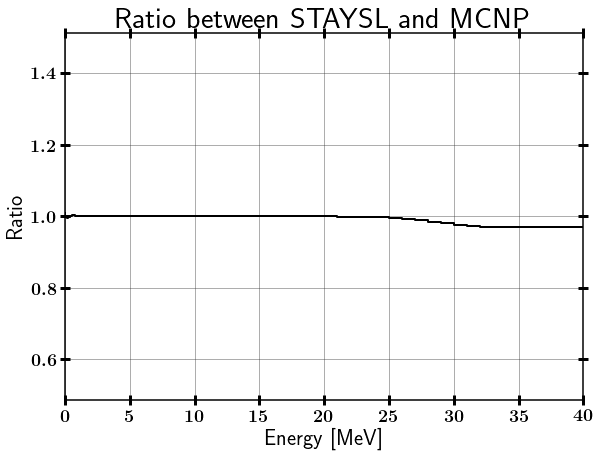

In [18]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2)
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=4E4, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))